<a href="https://colab.research.google.com/github/seunghwan1228/Titanic/blob/master/4)Titanic_ML_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This document contains several ML models, 
the baseline of accuracy is 

Training : 0.8441011235955056  ≈  84.41%

Validation : 0.7988826815642458  ≈  79.89%

---
## Object : 

Running many different models and choose more valueable model to use 

---


Part 2
* ## KNN
* ## Naive Bayes
* ## SVM - linear / kernel


---
-

part 3
*  Decision Tree - with visualization
*  Boosting - Adaboost / gradient boost
*  RandomForest
*  Ensemble - Vote classifier with (Randomforest, KNN, Naive Bayes, Logit, SVM)



---


part 4
*  Neural network with Keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

# 0) pre_steps

In [0]:
train = pd.read_csv('/content/drive/input/Titanic/working_dir/train_final.csv')

In [0]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Survived
0,-0.502445,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.786845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.488854,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.420730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.486337,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [0]:
y = train.Survived
X = train.drop('Survived', axis=1)

In [0]:
print(X.shape)
print(y.shape)

(891, 29)
(891,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 29) (712,)
(179, 29) (179,)


# 1)  KNN

In [0]:
knn_clf = KNeighborsClassifier()

In [0]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn_clf.score(X_train, y_train)

0.8665730337078652

In [0]:
knn_y_pred = knn_clf.predict(X_train)
knn_y_pred_test = knn_clf.predict(X_test)

In [0]:
knn_clf.score(X_test, y_test)

0.8268156424581006

KNN(n_neighbors = 5(default)) 

train : 86.66%

test = 82.68%

In [0]:
confusion_matrix(y_train,knn_y_pred)

array([[405,  39],
       [ 56, 212]])

In [0]:
clf_report = classification_report(y_train, knn_y_pred)
print('Train')
print(clf_report)

print('-------------------------------------------------------------------')
clf_report_test = classification_report(y_test, knn_y_pred_test)
print('Test')
print(clf_report_test)

Train
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       444
           1       0.84      0.79      0.82       268

    accuracy                           0.87       712
   macro avg       0.86      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712

-------------------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [0]:
roc_auc_score(y_train, knn_y_pred)

0.8516034691407824

In [0]:
roc_auc_score(y_test, knn_y_pred_test)

0.8184684684684684

## Simple hyperparam tune - n_neighbors only

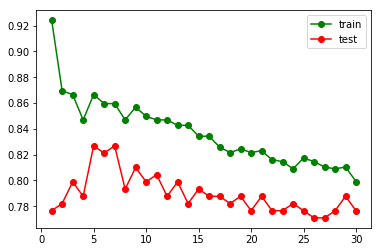

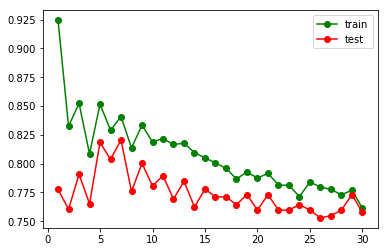

In [0]:
train_score = []
train_auc = []
test_score = []
test_auc =[]

for i in range(1, 31):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  
  knn_model.fit(X_train, y_train)
  
  y_pred_train = knn_model.predict(X_train)
  y_score_train = accuracy_score(y_train, y_pred_train)
  roc_auc_score_train = roc_auc_score(y_train, y_pred_train)
  
  train_score.append(y_score_train)
  train_auc.append(roc_auc_score_train)
  
  y_pred_test = knn_model.predict(X_test)
  y_score_test = accuracy_score(y_test, y_pred_test)
  roc_auc_score_test = roc_auc_score(y_test, y_pred_test)
  
  test_score.append(y_score_test)
  test_auc.append(roc_auc_score_test)
  

train_score = np.array(train_score)
train_auc = np.array(train_auc)
test_score = np.array(test_score)
test_auc = np.array(test_auc)
knn_neighbors_x_ticks = np.arange(1,31)

plt.figure()
plt.plot(knn_neighbors_x_ticks, train_score, 'g-o', label = 'train')
plt.plot(knn_neighbors_x_ticks, test_score, 'r-o', label = 'test')
plt.legend()

plt.figure()
plt.plot(knn_neighbors_x_ticks, train_auc, 'g-o', label='train')
plt.plot(knn_neighbors_x_ticks, test_auc, 'r-o', label = 'test')
plt.legend()

## KNN - GridSearchCV

In [0]:
params = {'n_neighbors':np.arange(1,50),
          'weights' : ['uniform', 'distance'],
          'p':[1,2,3,4,5]}

In [0]:
knn_grid = GridSearchCV(KNeighborsClassifier(), params, cv = 5)

In [0]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
knn_grid.best_params_

{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}

In [0]:
knn_grid.best_score_

0.824438202247191

knn with optimized

In [0]:
knn_grid.best_estimator_.score(X_train,y_train)

0.8469101123595506

In [0]:
knn_grid.best_estimator_.score(X_test, y_test)

0.7932960893854749

## Conclusion : 

for the KNN, its baseline is 

Train : 0.8665730337078652 $\approx 86.66$%

test = 0.8268156424581006 $\approx 82.68$%

---
the model could be better via gridsearch , however, its score is 

Train : 0.8469101123595506 $ \approx 84.69$% 

Test : 0.7932960893854749  $\approx 79.32$%

even the base model has more bigger AUC score

# 2) Naive Bayes

## 2-1) Naive Bayes - BernoulliNB


one-hot encoding, you are basically dealing with boolean features now. In other words each term/feature is following a Bernoulli distribution. That being said, I would use a multivariate Bernoulli NB or a multinomial NB with boolean features (which you already have). Gaussian NB seems a bit off here since you don't deal with real-valued features.  - from StackExchange

In [0]:
br_clf = BernoulliNB()

In [0]:
br_clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
br_clf.score(X_train, y_train)

0.8019662921348315

In [0]:
br_clf.score(X_test, y_test)

0.7821229050279329

## 2-2) Naive Bayes - GaussianNB - reference

In [0]:
gb_clf = GaussianNB()

In [0]:
gb_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
gb_clf.score(X_train, y_train)

0.4101123595505618

In [0]:
gb_clf.score(X_test, y_test)

0.4245810055865922

## Conclusion, 
the data is already onehot encoded, and it represents boolean features. So i used the BernoulliNB, and its performance is 

Train : 0.8019662921348315 $\approx$ 80.20%

Test : 0.7821229050279329  $\approx$ 78.21%

# 3) SVM

## 4-1) Linear SVC

In [0]:
svm_lin_clf = LinearSVC(random_state=42)

In [0]:
svm_lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [0]:
svm_lin_clf.score(X_train, y_train)

0.8370786516853933

In [0]:
svm_lin_clf.score(X_test, y_test)

0.8100558659217877

## Linear SVC - GridSearch

In [0]:
params = {'loss':['hinge', ],
          'C' : np.logspace(0, 10, 50)}

In [0]:
svm_lin_grid = GridSearchCV(LinearSVC(random_state = 42), params, cv = 5)

In [0]:
svm_lin_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 1.59985872e+00, 2.55954792e+00, 4.09491506e+...
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.25055193e+09, 1.00000000e+10]),
                         'loss': ['hinge']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
         

In [0]:
svm_lin_grid.best_params_

{'C': 1.599858719606058, 'loss': 'hinge'}

In [0]:
svm_lin_grid.best_score_

0.824438202247191

In [0]:
svm_lin_grid.best_estimator_.score(X_train, y_train)

0.8286516853932584

In [0]:
svm_lin_grid.best_estimator_.score(X_test, y_test)

0.8100558659217877

### Reference : only change loss

In [0]:
ref_svm_lin = LinearSVC(loss = 'hinge', random_state=42)

In [0]:
ref_svm_lin.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [0]:
ref_svm_lin.score(X_train, y_train)

0.8286516853932584

In [0]:
ref_svm_lin.score(X_test, y_test)

0.8100558659217877

## Conclusion - Linear SVC

for the linear svc, its performance is 

Train : 0.8286516853932584  $\approx $ 82.87%

Test : 0.8100558659217877 $\approx $ 81.00%

## 4-2) SVC with Kernel

In [0]:
svm_clf = SVC()

In [0]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svm_clf.score(X_train, y_train)

0.7935393258426966

In [0]:
svm_clf.score(X_test, y_test)

0.7821229050279329

## SVC - GridSearch

In [0]:
params = {'C': np.linspace(1, 100, 50),
          'gamma': [0, 1, 0.1, 0.001, 0.0001],
          'kernel' : ['rbf', 'linear']}

In [0]:
svm_grid = GridSearchCV(SVC(random_state=42), params, cv = 5)

In [0]:
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([  1.        ,   3.02040816,   5.04081633,   7.06...
        65.65306122,  67.67346939,  69.69387755,  71.71428571,
        73.73469388,  75.75510204,  77.7755102 ,  79.79591837,
        81.81632653,  83.83673469,  85.85714286,  87.87755102,
        89.89795918,  91.91836735,  93.93877551,  95.95918367,
        97.97959184, 100.        ]),
                         'gamma': [0, 1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, retur

In [0]:
svm_grid.best_params_

{'C': 3.020408163265306, 'gamma': 0.1, 'kernel': 'rbf'}

In [0]:
svm_grid.best_score_

0.8356741573033708

In [0]:
svm_grid.best_estimator_.score(X_train, y_train)

0.8553370786516854

In [0]:
svm_grid.best_estimator_.score(X_test, y_test)

0.7988826815642458

## Conclusion - SVC

for the svc with kernal, its performance is 

Train : 0.8553370786516854  $\approx $ 85.53%

Test : 0.7988826815642458 $\approx $ 79.89%

with gridsearch : 

{'C': 3.020408163265306, 'gamma': 0.1, 'kernel': 'rbf'}